<a href="https://colab.research.google.com/github/amandadzunuri/amanda-resolusi/blob/master/Tubes_KCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# pembuatan library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import random

In [70]:
# inisialisasi koordinat tiap objek wisata
daftarKota = [[-7.4315255, 109.2277845], [-7.4120017, 109.2353627],
                   [-7.3744601, 109.2379568], [-7.332775,109.2251154],
                   [-7.3063544, 109.2298536], [-7.3022129, 109.2447195]]
daftarNamaKota = ['Menara Teratai', 'Taman Mas Kemambang',
                       'The Village', 'Small World',
                       'Kebun Raya Bturaden', 'Hutan Pinus Limpakuwus']

# menentukan titik awal dan akhir yang akan dituju
kotaPertama = int(input('''0 = Menara Pandang
1 = Taman Mas Kemambang
2 = The Village
3 = Small World
4 = Kebun Raya Baturraden
5 = Hutan Pinus Limpakuwus
Masukkan Objek Wisata Pertama : '''))
kotaTerakhir = int(input("Masukkan Objek Wisata Terakhir : "))

0 = Menara Pandang
1 = Taman Mas Kemambang
2 = The Village
3 = Small World
4 = Kebun Raya Baturraden
5 = Hutan Pinus Limpakuwus
Masukkan Objek Wisata Pertama : 5
Masukkan Objek Wisata Terakhir : 1


In [71]:
# inisialisasi populasi secara acak
def initPopulasi(ukuranPopulasi, jumlahKota):
  P = np.empty((ukuranPopulasi, jumlahKota))
  P = P.astype('int')

  for i in range(ukuranPopulasi):
    individu = np.random.permutation(jumlahKota)
    P[i][0], P[i][jumlahKota-1] = kotaPertama, kotaTerakhir
    index = 1
    for j in individu:
      if j == kotaPertama or j == kotaTerakhir:
        continue
      P[i][index] = j
      index += 1
  return P

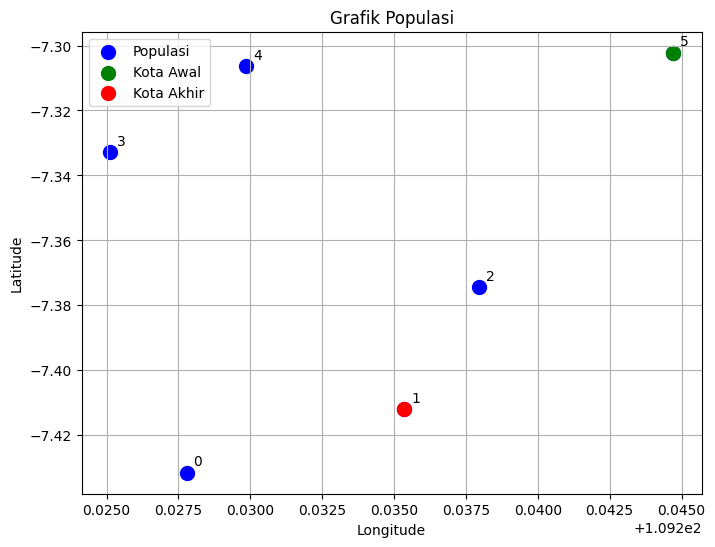

In [72]:
# Fungsi untuk menampilkan grafik populasi
def tampilkanGrafikPopulasi(P, daftarKota):
    x = [daftarKota[i][1] for i in P[0]]
    y = [daftarKota[i][0] for i in P[0]]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='b', marker='o', s=100, label='Populasi')
    plt.scatter(x[0], y[0], c='g', marker='o', s=100, label='Kota Awal')
    plt.scatter(x[-1], y[-1], c='r', marker='o', s=100, label='Kota Akhir')

    for i, txt in enumerate(P[0]):
        plt.annotate(txt, (x[i], y[i]), xytext=(5, 5), textcoords='offset points')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Grafik Populasi')
    plt.legend()
    plt.grid()
    plt.show()

# Contoh penggunaan fungsi untuk menampilkan grafik populasi
P = initPopulasi(10, 6)  # Menginisialisasi populasi dengan 10 individu dan 6 kota
tampilkanGrafikPopulasi(P, daftarKota)


In [73]:
# kalkulasi fitness dengan rumus euclidean

def fungsiFitness (populasi,daftarKota):
  sz = populasi.shape
  ukuranPopulasi = sz[0]
  n = sz[1]

  matrikJarak = np.empty((ukuranPopulasi))
  matrikJarak = matrikJarak.astype('float')

  for i in range(ukuranPopulasi):
     jarak = 0
     for j in range(n-1):
       jrkX = daftarKota[populasi[i][j]][0]-daftarKota[populasi[i][j+1]][0]
       jrkY = daftarKota[populasi[i][j]][1]-daftarKota[populasi[i][j+1]][1]
       d = np.sqrt(jrkX**2 + jrkY**2 )
       jarak = jarak + d

     matrikJarak[i] = jarak

  return matrikJarak


In [74]:
# mencari induk secara acak
def seleksi (P,fsFit):
  jmlInduk = 2
  sz = P.shape
  ukuranPopulasi = sz[0]
  jumlahKota = sz[1]

  Induk = np.empty((jmlInduk, jumlahKota))
  Induk = Induk.astype('int')

  for i in range(2):
    #memilih dua individu secara acak
    r1 = random.randint(0, ukuranPopulasi-1)
    r2 = random.randint(0, ukuranPopulasi-2)
    while r1 == r2:
      r2 = random.randint(0, ukuranPopulasi-1)

    for j in range(jumlahKota):
      if fsFit[r1] < fsFit[r2]:
        Induk [i][j] = P[r1][j]
      else:
        Induk [i][j] = P[r2][j]
  return Induk

In [75]:
# menukar gen pada kromosom induk dan menimpannya pada variabel anak (amad)
def crossover(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]

  Anak = np.empty((brs,kol))
  Anak = Anak.astype('int')

  for i in range(kol):
    if i == 0 or i == 8:
      Anak[0][i] = Induk[0][i]
      Anak[1][i] = Induk[1][i]
    else:
      Anak[0][i] = Induk[1][i]
      Anak[1][i] = Induk[0][i]

  return Anak


In [76]:
# menukar gen secara acak pada kromosom
def MutasiSwap(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  Anak = np.empty((brs, kol))
  Anak = Anak.astype('int')

  Anak = Induk

  r1 = random.randint(1, kol-2)
  r2 = random.randint(1, kol-2)

  while r1 == r2:
    r2 =  random.randint(1, kol-2)

  l1rs1 = Induk [0][r1]
  l1rs2 = Induk [0][r2]
  l2rs1 = Induk [1][r1]
  l2rs2 = Induk [1][r2]

  Anak [0][r1] = l1rs1
  Anak [0][r2] = l1rs2
  Anak [1][r1] = l2rs1
  Anak [1][r2] = l2rs2

  return Anak

In [77]:
#menukar kromosomdenga nilai fitness terburuk jika kromosom anak memiliki fines yang lebih baik
def Elitism(P, Anak, fitP,  fitAnak):
  JumlahGenP = P.shape[1]
  JumlahAnak = Anak.shape[0]

  for i in range(JumlahAnak):
    iJelek = fitP.max()
    idxJelek = fitP.argmax()

    if fitAnak[i]<iJelek:
      fitP[idxJelek] = fitAnak[i]
      for j in range (JumlahGenP):
        P[idxJelek][j] = Anak[i][j]
  return [P, fitP]

# inisialisasi parameter
ukuranPopulasi = 100
max_generasi = 1000
jumlahKota = len(daftarKota)

# inisialisasi populasi
P = initPopulasi (ukuranPopulasi, jumlahKota)

# melakukan evaluasi P
fitP = fungsiFitness(P, daftarKota)

for i in range (max_generasi):
  Induk = seleksi(P, fitP)

  Anak = crossover(Induk)
  Anak = MutasiSwap(Anak)

  fitAnak = fungsiFitness(Anak, daftarKota)

  [P, fitP] = Elitism(P, Anak, fitP, fitAnak)

print("rute terbaik yang didapatkan : ")
for i in P[fitP.argmin()]:
  print(daftarNamaKota[i], end=", ")

rute terbaik yang didapatkan : 
Hutan Pinus Limpakuwus, Kebun Raya Bturaden, Small World, The Village, Menara Teratai, Taman Mas Kemambang, 

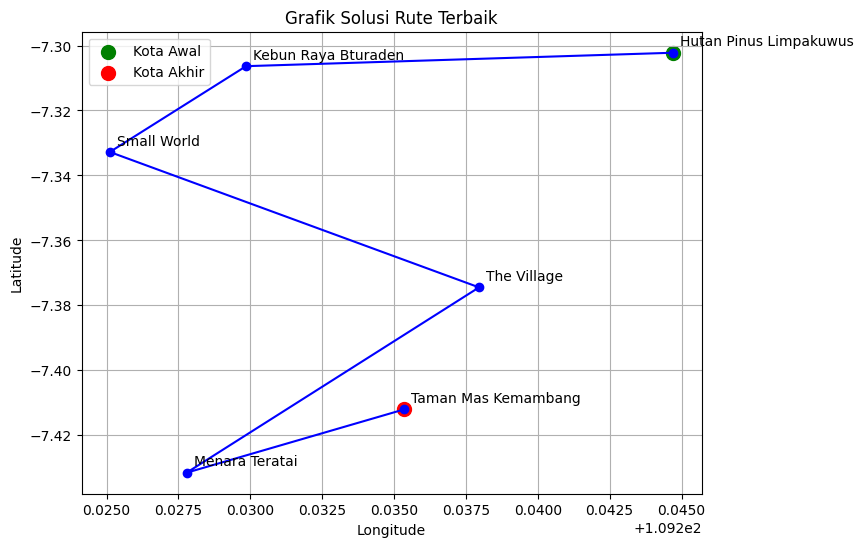

In [78]:
# Fungsi untuk menampilkan grafik populasi (revisi untuk menampilkan rute terbaik)
def tampilkanGrafikPopulasi(daftarKota, rute_terbaik):
    x = [daftarKota[i][1] for i in rute_terbaik]
    y = [daftarKota[i][0] for i in rute_terbaik]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.scatter(x[0], y[0], c='g', marker='o', s=100, label='Kota Awal')
    plt.scatter(x[-1], y[-1], c='r', marker='o', s=100, label='Kota Akhir')

    for i, txt in enumerate(rute_terbaik):
        plt.annotate(daftarNamaKota[txt], (x[i], y[i]), xytext=(5, 5), textcoords='offset points')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Grafik Solusi Rute Terbaik')
    plt.legend()
    plt.grid()
    plt.show()

# ...

# Setelah algoritma genetika selesai, dapatkan rute terbaik dari populasi
rute_terbaik = P[fitP.argmin()]

# Tampilkan grafik solusi rute terbaik
tampilkanGrafikPopulasi(daftarKota, rute_terbaik)
